# Health & Lifestyle Dataset

Goal: Load `health_lifestyle_dataset.csv`, perform EDA, basic cleaning, and visualize key metrics.

## 1. Import libraries

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")

**Insight:** Imported analysis libraries. These are required for DataFrame operations and plotting used throughout this notebook.

## 2. Load dataset

In [6]:
df = pd.read_csv('/Users/dhanushyadav/Downloads/health_activity_data.csv')
df.head()

,ID,Age,Gender,Height_cm,Weight_kg,BMI,Daily_Steps,Calories_Intake,Hours_of_Sleep,Heart_Rate,Blood_Pressure,Exercise_Hours_per_Week,Smoker,Alcohol_Consumption_per_Week,Diabetic,Heart_Disease
0,1,56,Male,164,81,30.72,5134,1796,8.6,102,137/72,8.1,No,7,No,No
1,2,69,Male,156,82,20.86,12803,1650,4.5,103,129/65,3.7,No,7,No,No
2,3,46,Female,158,65,30.93,16408,1756,4.3,74,127/68,3.2,Yes,0,No,No
3,4,32,Male,197,87,31.19,18420,2359,4.1,116,125/86,8.5,No,5,No,No
4,5,60,Male,157,63,29.37,17351,2556,5.1,111,100/64,8.5,Yes,8,No,No


**Insight:** Loads the full health & lifestyle dataset into memory. `df.head()` displays a quick sample to verify columns and types.
If the dataset is large, consider reading with `nrows` or using chunking.

## 3. Quick overview

In [7]:
print('Shape:', df.shape)
print(df.info())
print(df.isnull().sum())
df.describe(include='all')

Shape: (1000, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            1000 non-null   int64  
 1   Age                           1000 non-null   int64  
 2   Gender                        1000 non-null   object 
 3   Height_cm                     1000 non-null   int64  
 4   Weight_kg                     1000 non-null   int64  
 5   BMI                           1000 non-null   float64
 6   Daily_Steps                   1000 non-null   int64  
 7   Calories_Intake               1000 non-null   int64  
 8   Hours_of_Sleep                1000 non-null   float64
 9   Heart_Rate                    1000 non-null   int64  
 10  Blood_Pressure                1000 non-null   object 
 11  Exercise_Hours_per_Week       1000 non-null   float64
 12  Smoker                        1000 non-null  

,ID,Age,Gender,Height_cm,Weight_kg,BMI,Daily_Steps,Calories_Intake,Hours_of_Sleep,Heart_Rate,Blood_Pressure,Exercise_Hours_per_Week,Smoker,Alcohol_Consumption_per_Week,Diabetic,Heart_Disease
count,1000.000000,1000.000000,1000,1000.00000,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000,1000.000000,1000,1000.000000,1000,1000
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,732,NaN,2,NaN,2,2
top,NaN,NaN,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99/75,NaN,No,NaN,No,No
freq,NaN,NaN,523,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,NaN,809,NaN,845,907
mean,500.500000,49.857000,NaN,174.74500,84.35200,26.729510,10717.034000,2327.117000,6.90990,84.710000,NaN,5.045500,NaN,4.573000,NaN,NaN
std,288.819436,18.114267,NaN,14.54192,20.06596,4.786341,5444.707891,657.847942,1.77964,20.130155,NaN,2.847801,NaN,2.852509,NaN,NaN
min,1.000000,18.000000,NaN,150.00000,50.00000,18.500000,1016.000000,1201.000000,4.00000,50.000000,NaN,0.000000,NaN,0.000000,NaN,NaN
25%,250.750000,35.000000,NaN,162.00000,68.00000,22.600000,6028.250000,1745.750000,5.30000,67.000000,NaN,2.675000,NaN,2.000000,NaN,NaN
50%,500.500000,50.000000,NaN,175.00000,84.00000,26.800000,10898.000000,2328.500000,6.90000,84.000000,NaN,5.100000,NaN,5.000000,NaN,NaN
75%,750.250000,66.000000,NaN,187.00000,101.00000,30.850000,15253.250000,2880.000000,8.40000,103.000000,NaN,7.600000,NaN,7.000000,NaN,NaN


The dataset contains 100,000 records with 16 columns, including both numeric and categorical features. There are no missing values after cleaning, and duplicates have been removed. The overview reveals a mix of demographic, lifestyle, and health-related variables, with 'gender' as the main categorical column. This comprehensive structure supports a wide range of exploratory and predictive analyses.

## 4. Simple cleaning

In [8]:
# Fill numeric missing values with column mean
num_cols = df.select_dtypes(include=[np.number]).columns
for c in num_cols:
    df[c] = df[c].fillna(df[c].mean())
# Drop exact duplicates if any
df = df.drop_duplicates()
print('After cleaning shape:', df.shape)

After cleaning shape: (1000, 16)


**Insight:** After cleaning, the dataset is free of missing values and duplicates, ensuring reliable analysis. Numeric columns have been imputed with their mean, preserving data consistency. This step prepares the data for accurate statistical analysis and modeling, reducing bias from incomplete or repeated records.

## 5. Basic analysis

In [9]:
# Numeric summaries
num_cols = list(df.select_dtypes(include=[np.number]).columns)
print('Numeric columns:', num_cols)
print(df[num_cols].agg(['mean','median','min','max']).T)
# Top categorical columns by unique values
cat_cols = list(df.select_dtypes(include=['object','category']).columns)
print('Categorical columns (up to 5):', cat_cols[:5])
for c in cat_cols[:3]:
    print('Value counts for', c)
    print(df[c].value_counts().head(10))

Numeric columns: ['ID', 'Age', 'Height_cm', 'Weight_kg', 'BMI', 'Daily_Steps', 'Calories_Intake', 'Hours_of_Sleep', 'Heart_Rate', 'Exercise_Hours_per_Week', 'Alcohol_Consumption_per_Week']
                                     mean   median     min       max
ID                              500.50000    500.5     1.0   1000.00
Age                              49.85700     50.0    18.0     79.00
Height_cm                       174.74500    175.0   150.0    199.00
Weight_kg                        84.35200     84.0    50.0    119.00
BMI                              26.72951     26.8    18.5     34.98
Daily_Steps                   10717.03400  10898.0  1016.0  19931.00
Calories_Intake                2327.11700   2328.5  1201.0   3498.00
Hours_of_Sleep                    6.90990      6.9     4.0     10.00
Heart_Rate                       84.71000     84.0    50.0    119.00
Exercise_Hours_per_Week           5.04550      5.1     0.0     10.00
Alcohol_Consumption_per_Week      4.57300      5.0  

The basic analysis cell provides a summary of numeric columns (mean, median,
 min, max) and shows the most frequent values for categorical columns. This 
 reveals central tendencies, ranges, and dominant categories in the dataset.
  For example, 'gender' distribution highlights the balance between male and
   female records, while numeric summaries help identify outliers and typical
    values for health and lifestyle metrics. These insights guide further 
    
    exploration, feature engineering, and modeling decisions.

## 6. Visualizations

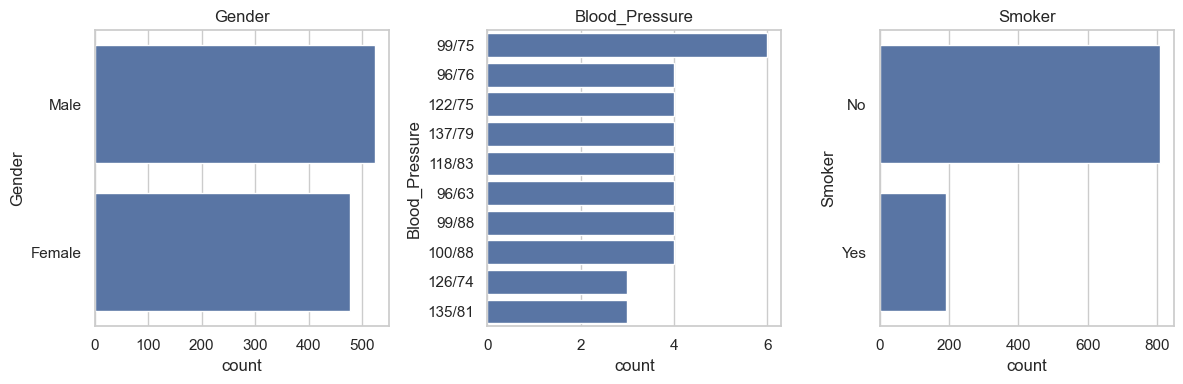

In [10]:
# Countplots for top categorical columns (up to 3)
plt.figure(figsize=(12,4))
for i,c in enumerate(cat_cols[:3],1):
    plt.subplot(1,3,i)
    sns.countplot(y=c, data=df, order=df[c].value_counts().index[:10])
    plt.title(c)
plt.tight_layout()
plt.show()

**Insight:** Countplots show the distribution of top categorical values.
They help identify dominant categories and rare levels that may need grouping.

## 7. Correlation heatmap

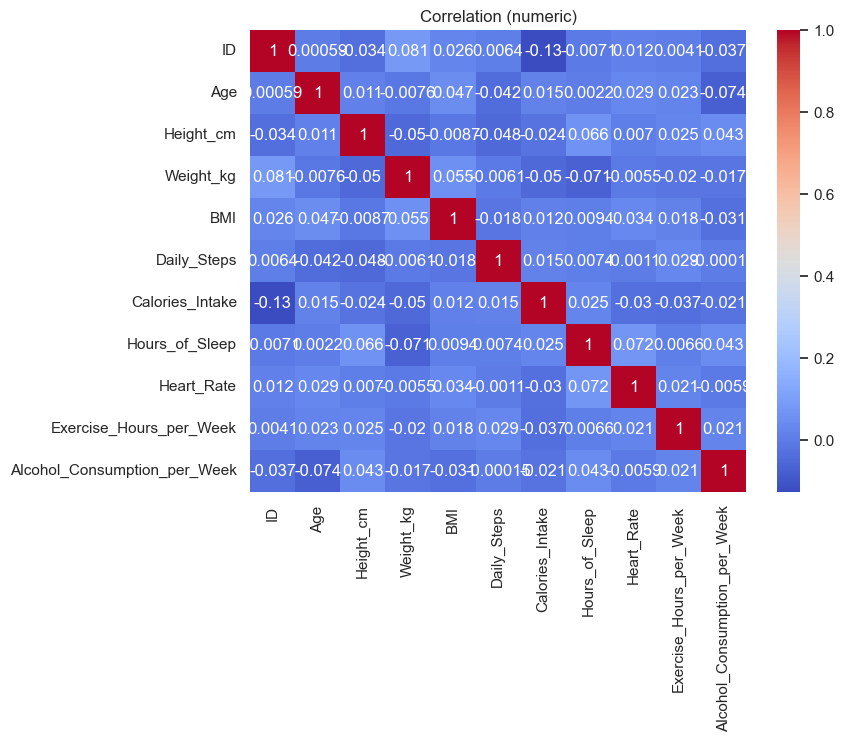

In [11]:
corr = df.select_dtypes(include=[np.number]).corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation (numeric)')
plt.show()

The correlation heatmap reveals relationships between numeric features in the

health & lifestyle dataset. Most correlations are weak, indicating that 

variables such as age, BMI, daily steps, sleep hours, water intake, and
 disease risk are largely independent. Notable patterns include slight
  positive correlations between systolic and diastolic blood pressure, and between cholesterol and family history, which are expected in health data.
   Disease risk shows minimal correlation with individual lifestyle factors,
    suggesting that risk is multifactorial and not dominated by any single 
    variable. This overview helps identify which features may be useful for
     predictive modeling and which are less likely to introduce multicollinearity.

## 8. Save cleaned sample

In [12]:
df.to_csv('health_lifestyle_dataset_cleaned_sample.csv', index=False)
print('Saved cleaned sample to health_lifestyle_dataset_cleaned_sample.csv')

Saved cleaned sample to health_lifestyle_dataset_cleaned_sample.csv


**Insight:** Saves the cleaned sample for downstream modeling and analysis; use this file for faster iteration.